<a href="https://colab.research.google.com/github/dakyommii/MinhwaProject/blob/main/minhwa-explanation/train/hsv_classification_model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HSV 생성

In [40]:
import numpy as np
import colorsys
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# import random

# def random_hsv():
#     hue = random.uniform(0, 360)  # Hue 범위: 0 ~ 360
#     saturation = random.uniform(0, 1)  # Saturation 범위: 0 ~ 1
#     value = random.uniform(0, 1)  # Value 범위: 0 ~ 1
#     return hue, saturation, value

# num_samples = 1000
# random_hsv_list = []

# for _ in range(num_samples):
#     hue, saturation, value = random_hsv()
#     random_hsv_list.append((hue, saturation, value))

# print("Random HSV values for 1000 samples:")

# f=open("/content/drive/MyDrive/seol/test/hsv-val-test.txt",'w')
# for idx, (hue, saturation, value) in enumerate(random_hsv_list, start=1):
#     # print(f"Sample {idx}: Hue={hue:.2f}, Saturation={saturation:.2f}, Value={value:.2f}")
#     f.write(f"Sample {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()

Random HSV values for 1000 samples:


### train dataset 생성

In [ ]:
num_samples = 1000

# H, S, V 값 범위 정의
hue_range = [0, 360]
saturation_range = [0, 1]
value_range = [0, 1]

# H, S, V 값을 균등하게 나눈 후의 단계 수 계산
num_hue_steps = int(np.ceil(num_samples ** (1/3)))
num_saturation_steps = int(np.ceil(num_samples ** (1/3)))
num_value_steps = int(np.ceil(num_samples ** (1/3)))

# 균등하게 나눈 값 생성
hue_values = np.linspace(hue_range[0], hue_range[1], num_hue_steps)
saturation_values = np.linspace(saturation_range[0], saturation_range[1], num_saturation_steps)
value_values = np.linspace(value_range[0], value_range[1], num_value_steps)

# 가능한 모든 조합 생성
hsv_values = []
for hue in hue_values:
    for saturation in saturation_values:
        for value in value_values:
            hsv_values.append([hue, saturation, value])

# 필요한 조합만 추출하여 중복 제거
hsv_values = np.unique(np.around(hsv_values, decimals=2), axis=0)

# 만약 조합 개수가 1000개를 초과한다면, 처음 1000개만 선택
if len(hsv_values) > num_samples:
    hsv_values = hsv_values[:num_samples]

# 생성된 HSV 값을 출력
f=open("/content/drive/MyDrive/seol/test/hsv-test-ds.txt",'w')
for index, hsv in enumerate(hsv_values):
    f.write(f"HSV {index} {hsv[0]} {hsv[1]} {hsv[2]}\n")

f.close()


### val dataset 생성

In [ ]:
# import numpy as np

# def generate_random_purple_hsv():
#     hue_range = (270, 300)  # Purple 색상의 hue 범위를 270에서 300으로 설정
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0, 1)
#     random_value = np.random.uniform(0, 1)
#     return random_hue, random_saturation, random_value

# num_samples = 10

# purple_hsv_values = [generate_random_purple_hsv() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-purple.txt",'w')
# for idx, (hue, saturation, value) in enumerate(purple_hsv_values, start=1):
#     f.write(f"9 {230+idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")
#     # print(f"Sample {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [ ]:
# import numpy as np

# def generate_random_red_hsv():
#     hue_range = (0, 10)  # 빨간색의 색상 범위
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0.7, 1)  # 포화도를 높게 설정
#     random_value = np.random.uniform(0.5, 1)      # 명도를 높게 설정
#     return random_hue, random_saturation, random_value


# num_samples = 200

# red_hsv_values = [generate_random_red_hsv() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-red.txt",'w')
# for idx, (hue, saturation, value) in enumerate(red_hsv_values, start=1):
#     f.write(f"10 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()

In [ ]:
# def generate_random_white_hsv():
#     random_hue = np.random.uniform(0, 360)  # 0부터 360 범위 내에서 랜덤으로 hue 값 생성
#     random_saturation = np.random.uniform(0, 0.1)  # 낮은 saturation 값으로 "white" 효과 생성
#     random_value = np.random.uniform(0.9, 1)  # 높은 value 값으로 밝은 색상 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# white_hsv_values = [generate_random_white_hsv() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-white.txt",'w')
# for idx, (hue, saturation, value) in enumerate(white_hsv_values, start=1):
#     f.write(f"11 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [ ]:
# def generate_random_beige():
#     hue_range = (20, 40)  # "dark red"와 "red" 사이의 hue 범위를 설정
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0.1, 0.3)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0.88, 1)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# beige_hsv_values = [generate_random_beige() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-beige.txt",'w')
# for idx, (hue, saturation, value) in enumerate(beige_hsv_values, start=1):
#     f.write(f"0 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [ ]:
# def generate_random_black():
#     hue_range = (0, 360)  # "dark red"와 "red" 사이의 hue 범위를 설정
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0, 0.2)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0, 0.2)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# black_hsv_values = [generate_random_black() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-black.txt",'w')
# for idx, (hue, saturation, value) in enumerate(black_hsv_values, start=1):
#     f.write(f"1 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [ ]:
# def generate_random_blue():
#     hue_range = (210, 270)  # "dark red"와 "red" 사이의 hue 범위를 설정
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0.7, 1)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0.3, 1)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# blue_hsv_values = [generate_random_blue() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-blue.txt",'w')
# for idx, (hue, saturation, value) in enumerate(blue_hsv_values, start=1):
#     f.write(f"2 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [ ]:
# def generate_random_brown():
#     hue_range = (15, 45)  # "dark red"와 "red" 사이의 hue 범위를 설정
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0.4, 0.7)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0.3, 0.5)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# brown_hsv_values = [generate_random_brown() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-brown.txt",'w')
# for idx, (hue, saturation, value) in enumerate(brown_hsv_values, start=1):
#     f.write(f"2 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [ ]:
# def generate_random_gray():
#     hue_range = (0, 360)  # "dark red"와 "red" 사이의 hue 범위를 설정
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0, 0.1)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0.25, 0.6)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# gray_hsv_values = [generate_random_gray() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-gray.txt",'w')
# for idx, (hue, saturation, value) in enumerate(gray_hsv_values, start=1):
#     f.write(f"4 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [ ]:
# def generate_random_green():
#     hue_range = (90, 150)  # "dark red"와 "red" 사이의 hue 범위를 설정
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0.4, 0.7)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0.4, 0.7)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# green_hsv_values = [generate_random_green() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-green.txt",'w')
# for idx, (hue, saturation, value) in enumerate(green_hsv_values, start=1):
#     f.write(f"5 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [ ]:
# def generate_random_mint():
#     hue_range = (140, 160)  # "dark red"와 "red" 사이의 hue 범위를 설정
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0.2, 0.5)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0.8, 1)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# mint_hsv_values = [generate_random_mint() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-mint.txt",'w')
# for idx, (hue, saturation, value) in enumerate(mint_hsv_values, start=1):
#     f.write(f"6 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [2]:
# def generate_random_pink_hsv():
#     hue_range = (310, 345)  # "dark red"와 "red" 사이의 hue 범위를 설정
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0.4, 0.6)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0.8, 1)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# pink_hsv_values = [generate_random_pink_hsv() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-pink.txt",'w')
# for idx, (hue, saturation, value) in enumerate(pink_hsv_values, start=1):
#     f.write(f"7 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [8]:
# def generate_random_plum_hsv():
#     hue_range = (300, 345)
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0.5, 0.7)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0.4, 0.6)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# plum_hsv_values = [generate_random_plum_hsv() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-plum.txt",'w')
# for idx, (hue, saturation, value) in enumerate(plum_hsv_values, start=1):
#     f.write(f"8 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


In [14]:
# def generate_random_yellow_hsv():
#     hue_range = (55, 60)
#     random_hue = np.random.uniform(hue_range[0], hue_range[1])
#     random_saturation = np.random.uniform(0.8, 1)  # 중간 정도의 saturation 값
#     random_value = np.random.uniform(0.8, 1)  # 작은 value 값으로 "dark red" 효과 생성
#     return random_hue, random_saturation, random_value

# num_samples = 200

# yellow_hsv_values = [generate_random_yellow_hsv() for _ in range(num_samples)]

# f=open("/content/drive/MyDrive/seol/test/hsv-yellow.txt",'w')
# for idx, (hue, saturation, value) in enumerate(yellow_hsv_values, start=1):
#     f.write(f"8 {idx}: {hue:.2f} {saturation:.2f} {value:.2f}\n")

# f.close()


## color image 저장

In [4]:
def hsv_to_rgb(h, s, v):
    rgb = colorsys.hsv_to_rgb(h / 360, s, v)
    return tuple(int(val * 255) for val in rgb)

In [32]:
# with open('/content/drive/MyDrive/seol/test/hsv-yellow.txt', 'r') as f:
#     hsv_lst = f.readlines()

# for i in range(0,len(hsv_lst)):
#   num=int(hsv_lst[i].split(' ')[1][:-1])
#   h=float(hsv_lst[i].split(' ')[2])
#   s=float(hsv_lst[i].split(' ')[3])
#   v=float(hsv_lst[i].split(' ')[4])

#   rgb_color = hsv_to_rgb(h, s, v)

#   plt.imshow([[(rgb_color[0]/255, rgb_color[1]/255, rgb_color[2]/255)]])
#   plt.title(f"Hue={h}, Saturation={s}, Value={v}")
#   plt.axis('off')

#   plt.savefig('/content/drive/MyDrive/seol/test/hsv/add/%d.png'%(num))


## HSV dataset 생성

In [35]:
color_dic = {'beige': 0, 'black': 1, 'blue': 2, 'brown': 3, 'gray': 4, 'green': 5, 'mint': 6, 'pink': 7, 'plum': 8, 'purple': 9, 'red': 10, 'white': 11, 'yellow': 12}

### train-dataset

In [37]:
with open('/content/drive/MyDrive/seol/test/hsv.txt', 'r') as f:
    hsv_lst = f.readlines()

dataset = []
for i in range(0,len(hsv_lst)):
  h=float(hsv_lst[i].split(' ')[2])
  s=float(hsv_lst[i].split(' ')[3])
  v=float(hsv_lst[i].split(' ')[4])

  if(color_label=='blac'): color_label='black'
  elif(color_label=='blu'): color_label='blue'
  elif(color_label=='gree'): color_label='green'
  elif(color_label=='purpl'): color_label='purple'

  rgb=color_dic[color_label]

  dataset.append(([h, s, v], rgb))


### validation dataset

In [28]:
with open('/content/drive/MyDrive/seol/test/hsv-val.txt', 'r') as f:
    hsv_lst = f.readlines()

val_dataset = []
for i in range(0,len(hsv_lst)):
  rgb=int(hsv_lst[i].split(' ')[0])
  h=float(hsv_lst[i].split(' ')[2])
  s=float(hsv_lst[i].split(' ')[3])
  v=float(hsv_lst[i].split(' ')[4])

  val_dataset.append(([h, s, v], rgb))

## HSV regression model train

### train

In [39]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt

# 데이터 전처리
X = np.array([data[0] for data in dataset], dtype=np.float32)
y = np.array([data[1] for data in dataset], dtype=np.int32)

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),  # 새로운 레이어 추가
    tf.keras.layers.Dense(13, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ModelCheckpoint 콜백 설정
checkpoint_filepath = '/content/drive/MyDrive/seol/ckpt/color_regression_fin-t.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='accuracy',
    mode='max',
    verbose=1
)

# 모델 훈련
history = model.fit(X, y, epochs=500, batch_size=32, callbacks=[model_checkpoint_callback])

# 학습 곡선 그리기
plt.figure(figsize=(12, 4))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/seol/ckpt/color_regression_fin.h5')

# sample_hue = 200
# sample_saturation = 0.6
# sample_value = 0.8
# sample_hsv = np.array([[sample_hue, sample_saturation, sample_value]], dtype=np.float32)
# predicted_color_probs = loaded_model.predict(sample_hsv)
# predicted_color_label = np.argmax(predicted_color_probs)

# print(f"Predicted color for HSV ({sample_hue}, {sample_saturation}, {sample_value}): {predicted_color_label}")

## HSV predict

### predict

1/1 [==============================] - 0s 135ms/step
Predicted color for HSV (0.0, 0.0, 0.0): 1
1/1 [==============================] - 0s 74ms/step
Predicted color for HSV (240.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 74ms/step
Predicted color for HSV (240.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 76ms/step
Predicted color for HSV (240.0, 1.0, 0.0): 1


1/1 [==============================] - 0s 73ms/step
Predicted color for HSV (240.0, 1.0, 0.0): 1


1/1 [==============================] - 0s 83ms/step
Predicted color for HSV (240.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 72ms/step
Predicted color for HSV (240.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 72ms/step
Predicted color for HSV (240.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 73ms/step
Predicted color for HSV (240.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 73ms/step
Predicted color for HSV (240.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 76ms/step
Predicted color for HSV (120.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 70ms/step
Predicted color for HSV (180.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 74ms/step
Predicted color for HSV (210.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 71ms/step
Predicted color for HSV (220.0, 1.0, 0.0): 1
1/1 [==============================] - 0s 94ms/step
Predicted color for HSV (225.0, 1.0, 0.0): 1
1/1 [=========================

Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (359.98, 1.0, 1.1): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (359.95, 1.0, 1.1): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (359.93, 1.0, 1.1): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.91, 1.0, 1.1): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.88, 1.0, 1.1): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (359.86, 1.0, 1.1): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (359.83, 1.0, 1.1): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (359.81, 1.0, 1.1): 10
1/1 [==============================] - 0s 85ms/step


Predicted color for HSV (359.79, 1.0, 1.1): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (0.02, 1.0, 1.1): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (359.98, 1.0, 1.1): 10
1/1 [==============================] - 1s 666ms/step


Predicted color for HSV (359.95, 1.0, 1.1): 10
1/1 [==============================] - 0s 98ms/step


Predicted color for HSV (359.93, 1.0, 1.1): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (359.9, 1.0, 1.1): 10
1/1 [==============================] - 0s 102ms/step


Predicted color for HSV (359.88, 1.0, 1.1): 10
1/1 [==============================] - 0s 88ms/step


Predicted color for HSV (359.86, 1.0, 1.1): 10
1/1 [==============================] - 0s 84ms/step


Predicted color for HSV (359.83, 1.0, 1.1): 10
1/1 [==============================] - 0s 83ms/step


Predicted color for HSV (359.81, 1.0, 1.1): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (0.05, 1.0, 1.1): 10
1/1 [==============================] - 0s 88ms/step


Predicted color for HSV (0.02, 1.0, 1.1): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 87ms/step


Predicted color for HSV (359.98, 1.0, 1.1): 10
1/1 [==============================] - 0s 90ms/step


Predicted color for HSV (359.95, 1.0, 1.1): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (359.93, 1.0, 1.1): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (359.9, 1.0, 1.1): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (359.88, 1.0, 1.1): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (359.86, 1.0, 1.1): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (359.83, 1.0, 1.1): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.07, 1.0, 1.1): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.05, 1.0, 1.1): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.02, 1.0, 1.1): 10
1/1 [==============================] - 0s 118ms/step


Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 101ms/step


Predicted color for HSV (359.98, 1.0, 1.1): 10
1/1 [==============================] - 0s 102ms/step


Predicted color for HSV (359.95, 1.0, 1.1): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (359.93, 1.0, 1.1): 10
1/1 [==============================] - 0s 111ms/step


Predicted color for HSV (359.9, 1.0, 1.1): 10
1/1 [==============================] - 0s 113ms/step


Predicted color for HSV (359.88, 1.0, 1.1): 10
1/1 [==============================] - 0s 126ms/step


Predicted color for HSV (359.86, 1.0, 1.1): 10
1/1 [==============================] - 0s 119ms/step


Predicted color for HSV (0.09, 1.0, 1.1): 10
1/1 [==============================] - 0s 97ms/step


Predicted color for HSV (0.07, 1.0, 1.1): 10
1/1 [==============================] - 0s 106ms/step


Predicted color for HSV (0.05, 1.0, 1.1): 10
1/1 [==============================] - 0s 101ms/step


Predicted color for HSV (0.02, 1.0, 1.1): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 125ms/step


Predicted color for HSV (359.97, 1.0, 1.1): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (359.95, 1.0, 1.1): 10
1/1 [==============================] - 0s 111ms/step


Predicted color for HSV (359.93, 1.0, 1.1): 10
1/1 [==============================] - 0s 110ms/step


Predicted color for HSV (359.9, 1.0, 1.1): 10
1/1 [==============================] - 0s 97ms/step


Predicted color for HSV (359.88, 1.0, 1.1): 10
1/1 [==============================] - 0s 106ms/step


Predicted color for HSV (0.12, 1.0, 1.1): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (0.1, 1.0, 1.1): 10
1/1 [==============================] - 0s 115ms/step


Predicted color for HSV (0.07, 1.0, 1.1): 10
1/1 [==============================] - 0s 68ms/step


Predicted color for HSV (0.05, 1.0, 1.1): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (0.03, 1.0, 1.1): 10
1/1 [==============================] - 0s 89ms/step


Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (359.98, 1.0, 1.1): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (359.95, 1.0, 1.1): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (359.93, 1.0, 1.1): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (359.91, 1.0, 1.1): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.14, 1.0, 1.1): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (0.12, 1.0, 1.1): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.1, 1.0, 1.1): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (0.07, 1.0, 1.1): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (0.05, 1.0, 1.1): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.02, 1.0, 1.1): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (359.98, 1.0, 1.1): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (359.95, 1.0, 1.1): 10
1/1 [==============================] - 0s 83ms/step


Predicted color for HSV (359.93, 1.0, 1.1): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.17, 1.0, 1.1): 10
1/1 [==============================] - 0s 85ms/step


Predicted color for HSV (0.14, 1.0, 1.1): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (0.12, 1.0, 1.1): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (0.1, 1.0, 1.1): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.07, 1.0, 1.1): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.05, 1.0, 1.1): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.02, 1.0, 1.1): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (359.98, 1.0, 1.1): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (359.95, 1.0, 1.1): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.19, 1.0, 1.1): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.17, 1.0, 1.1): 10
1/1 [==============================] - 0s 97ms/step


Predicted color for HSV (0.14, 1.0, 1.1): 10
1/1 [==============================] - 0s 103ms/step


Predicted color for HSV (0.12, 1.0, 1.1): 10
1/1 [==============================] - 0s 87ms/step


Predicted color for HSV (0.1, 1.0, 1.1): 10
1/1 [==============================] - 0s 93ms/step


Predicted color for HSV (0.07, 1.0, 1.1): 10
1/1 [==============================] - 0s 91ms/step


Predicted color for HSV (0.05, 1.0, 1.1): 10
1/1 [==============================] - 0s 92ms/step


Predicted color for HSV (0.02, 1.0, 1.1): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 86ms/step


Predicted color for HSV (359.98, 1.0, 1.1): 10
1/1 [==============================] - 0s 88ms/step


Predicted color for HSV (0.21, 1.0, 1.1): 10
1/1 [==============================] - 0s 86ms/step


Predicted color for HSV (0.19, 1.0, 1.1): 10
1/1 [==============================] - 0s 121ms/step


Predicted color for HSV (0.17, 1.0, 1.1): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (0.14, 1.0, 1.1): 10
1/1 [==============================] - 0s 113ms/step


Predicted color for HSV (0.12, 1.0, 1.1): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (0.09, 1.0, 1.1): 10
1/1 [==============================] - 0s 114ms/step


Predicted color for HSV (0.07, 1.0, 1.1): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (0.05, 1.0, 1.1): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (0.02, 1.0, 1.1): 10
1/1 [==============================] - 0s 109ms/step


Predicted color for HSV (0.0, 1.0, 1.1): 10
1/1 [==============================] - 0s 101ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 100ms/step


Predicted color for HSV (359.98, 1.0, 1.25): 10
1/1 [==============================] - 0s 108ms/step


Predicted color for HSV (359.96, 1.0, 1.25): 10
1/1 [==============================] - 0s 109ms/step


Predicted color for HSV (359.94, 1.0, 1.25): 10
1/1 [==============================] - 0s 107ms/step


Predicted color for HSV (359.92, 1.0, 1.25): 10
1/1 [==============================] - 0s 101ms/step


Predicted color for HSV (359.89, 1.0, 1.25): 10
1/1 [==============================] - 0s 100ms/step


Predicted color for HSV (359.87, 1.0, 1.25): 10
1/1 [==============================] - 0s 128ms/step


Predicted color for HSV (359.85, 1.0, 1.25): 10
1/1 [==============================] - 0s 111ms/step


Predicted color for HSV (359.83, 1.0, 1.25): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (359.81, 1.0, 1.25): 10
1/1 [==============================] - 0s 117ms/step


Predicted color for HSV (0.02, 1.0, 1.25): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.98, 1.0, 1.25): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (359.96, 1.0, 1.25): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (359.94, 1.0, 1.25): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (359.92, 1.0, 1.25): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (359.89, 1.0, 1.25): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (359.87, 1.0, 1.25): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (359.85, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.83, 1.0, 1.25): 10
1/1 [==============================] - 0s 84ms/step


Predicted color for HSV (0.04, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.02, 1.0, 1.25): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.98, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.96, 1.0, 1.25): 10
1/1 [==============================] - 0s 70ms/step


Predicted color for HSV (359.94, 1.0, 1.25): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (359.92, 1.0, 1.25): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (359.89, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.87, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.85, 1.0, 1.25): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.06, 1.0, 1.25): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (0.04, 1.0, 1.25): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (0.02, 1.0, 1.25): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (359.98, 1.0, 1.25): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (359.96, 1.0, 1.25): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (359.94, 1.0, 1.25): 10
1/1 [==============================] - 0s 70ms/step


Predicted color for HSV (359.92, 1.0, 1.25): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (359.89, 1.0, 1.25): 10
1/1 [==============================] - 0s 69ms/step


Predicted color for HSV (359.87, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.08, 1.0, 1.25): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.06, 1.0, 1.25): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (0.04, 1.0, 1.25): 10
1/1 [==============================] - 0s 69ms/step


Predicted color for HSV (0.02, 1.0, 1.25): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (359.98, 1.0, 1.25): 10
1/1 [==============================] - 0s 70ms/step


Predicted color for HSV (359.96, 1.0, 1.25): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (359.94, 1.0, 1.25): 10
1/1 [==============================] - 0s 70ms/step


Predicted color for HSV (359.92, 1.0, 1.25): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (359.89, 1.0, 1.25): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.11, 1.0, 1.25): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.08, 1.0, 1.25): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (0.06, 1.0, 1.25): 10
1/1 [==============================] - 0s 122ms/step


Predicted color for HSV (0.04, 1.0, 1.25): 10
1/1 [==============================] - 0s 121ms/step


Predicted color for HSV (0.02, 1.0, 1.25): 10
1/1 [==============================] - 0s 126ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 129ms/step


Predicted color for HSV (359.98, 1.0, 1.25): 10
1/1 [==============================] - 0s 120ms/step


Predicted color for HSV (359.96, 1.0, 1.25): 10
1/1 [==============================] - 0s 108ms/step


Predicted color for HSV (359.94, 1.0, 1.25): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (359.92, 1.0, 1.25): 10
1/1 [==============================] - 0s 115ms/step


Predicted color for HSV (0.13, 1.0, 1.25): 10
1/1 [==============================] - 0s 109ms/step


Predicted color for HSV (0.11, 1.0, 1.25): 10
1/1 [==============================] - 0s 102ms/step


Predicted color for HSV (0.08, 1.0, 1.25): 10
1/1 [==============================] - 0s 109ms/step


Predicted color for HSV (0.06, 1.0, 1.25): 10
1/1 [==============================] - 0s 105ms/step


Predicted color for HSV (0.04, 1.0, 1.25): 10
1/1 [==============================] - 0s 106ms/step


Predicted color for HSV (0.02, 1.0, 1.25): 10
1/1 [==============================] - 0s 108ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 106ms/step


Predicted color for HSV (359.98, 1.0, 1.25): 10
1/1 [==============================] - 0s 100ms/step


Predicted color for HSV (359.96, 1.0, 1.25): 10
1/1 [==============================] - 0s 125ms/step


Predicted color for HSV (359.94, 1.0, 1.25): 10
1/1 [==============================] - 0s 101ms/step


Predicted color for HSV (0.15, 1.0, 1.25): 10
1/1 [==============================] - 0s 69ms/step


Predicted color for HSV (0.13, 1.0, 1.25): 10
1/1 [==============================] - 0s 85ms/step


Predicted color for HSV (0.11, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.08, 1.0, 1.25): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.06, 1.0, 1.25): 10
1/1 [==============================] - 0s 90ms/step


Predicted color for HSV (0.04, 1.0, 1.25): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (0.02, 1.0, 1.25): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (359.98, 1.0, 1.25): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (359.96, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.17, 1.0, 1.25): 10
1/1 [==============================] - 0s 85ms/step


Predicted color for HSV (0.15, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.13, 1.0, 1.25): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.11, 1.0, 1.25): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.08, 1.0, 1.25): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.06, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.04, 1.0, 1.25): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.02, 1.0, 1.25): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (359.98, 1.0, 1.25): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.19, 1.0, 1.25): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (0.17, 1.0, 1.25): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (0.15, 1.0, 1.25): 10
1/1 [==============================] - 0s 82ms/step


Predicted color for HSV (0.13, 1.0, 1.25): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (0.11, 1.0, 1.25): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (0.08, 1.0, 1.25): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.06, 1.0, 1.25): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (0.04, 1.0, 1.25): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (0.02, 1.0, 1.25): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (0.0, 1.0, 1.25): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (359.98, 1.0, 1.41): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (359.96, 1.0, 1.41): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (359.94, 1.0, 1.41): 10
1/1 [==============================] - 0s 71ms/step


Predicted color for HSV (359.93, 1.0, 1.41): 10
1/1 [==============================] - 0s 70ms/step


Predicted color for HSV (359.91, 1.0, 1.41): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (359.89, 1.0, 1.41): 10
1/1 [==============================] - 0s 85ms/step


Predicted color for HSV (359.87, 1.0, 1.41): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (359.85, 1.0, 1.41): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (359.83, 1.0, 1.41): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.02, 1.0, 1.41): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (359.98, 1.0, 1.41): 10
1/1 [==============================] - 0s 113ms/step


Predicted color for HSV (359.96, 1.0, 1.41): 10
1/1 [==============================] - 0s 107ms/step


Predicted color for HSV (359.94, 1.0, 1.41): 10
1/1 [==============================] - 0s 107ms/step


Predicted color for HSV (359.92, 1.0, 1.41): 10
1/1 [==============================] - 0s 103ms/step


Predicted color for HSV (359.91, 1.0, 1.41): 10
1/1 [==============================] - 0s 104ms/step


Predicted color for HSV (359.89, 1.0, 1.41): 10
1/1 [==============================] - 0s 111ms/step


Predicted color for HSV (359.87, 1.0, 1.41): 10
1/1 [==============================] - 0s 97ms/step


Predicted color for HSV (359.85, 1.0, 1.41): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.04, 1.0, 1.41): 10
1/1 [==============================] - 0s 117ms/step


Predicted color for HSV (0.02, 1.0, 1.41): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 119ms/step


Predicted color for HSV (359.98, 1.0, 1.41): 10
1/1 [==============================] - 0s 132ms/step


Predicted color for HSV (359.96, 1.0, 1.41): 10
1/1 [==============================] - 0s 144ms/step


Predicted color for HSV (359.94, 1.0, 1.41): 10
1/1 [==============================] - 0s 131ms/step


Predicted color for HSV (359.92, 1.0, 1.41): 10
1/1 [==============================] - 0s 126ms/step


Predicted color for HSV (359.91, 1.0, 1.41): 10
1/1 [==============================] - 0s 132ms/step


Predicted color for HSV (359.89, 1.0, 1.41): 10
1/1 [==============================] - 0s 117ms/step


Predicted color for HSV (359.87, 1.0, 1.41): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (0.06, 1.0, 1.41): 10
1/1 [==============================] - 0s 97ms/step


Predicted color for HSV (0.04, 1.0, 1.41): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.02, 1.0, 1.41): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (359.98, 1.0, 1.41): 10
1/1 [==============================] - 0s 88ms/step


Predicted color for HSV (359.96, 1.0, 1.41): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (359.94, 1.0, 1.41): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (359.92, 1.0, 1.41): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (359.91, 1.0, 1.41): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (359.89, 1.0, 1.41): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.07, 1.0, 1.41): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (0.06, 1.0, 1.41): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (0.04, 1.0, 1.41): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (0.02, 1.0, 1.41): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.98, 1.0, 1.41): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.96, 1.0, 1.41): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (359.94, 1.0, 1.41): 10
1/1 [==============================] - 0s 83ms/step


Predicted color for HSV (359.92, 1.0, 1.41): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (359.91, 1.0, 1.41): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.09, 1.0, 1.41): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.08, 1.0, 1.41): 10
1/1 [==============================] - 0s 84ms/step


Predicted color for HSV (0.06, 1.0, 1.41): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (0.04, 1.0, 1.41): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.02, 1.0, 1.41): 10
1/1 [==============================] - 0s 91ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (359.98, 1.0, 1.41): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (359.96, 1.0, 1.41): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (359.94, 1.0, 1.41): 10
1/1 [==============================] - 0s 85ms/step


Predicted color for HSV (359.93, 1.0, 1.41): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.11, 1.0, 1.41): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.09, 1.0, 1.41): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (0.08, 1.0, 1.41): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.06, 1.0, 1.41): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.04, 1.0, 1.41): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.02, 1.0, 1.41): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (359.98, 1.0, 1.41): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (359.96, 1.0, 1.41): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (359.94, 1.0, 1.41): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (0.13, 1.0, 1.41): 10
1/1 [==============================] - 0s 103ms/step


Predicted color for HSV (0.11, 1.0, 1.41): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.09, 1.0, 1.41): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.08, 1.0, 1.41): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.06, 1.0, 1.41): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.04, 1.0, 1.41): 10
1/1 [==============================] - 0s 96ms/step


Predicted color for HSV (0.02, 1.0, 1.41): 10
1/1 [==============================] - 0s 126ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 102ms/step


Predicted color for HSV (359.98, 1.0, 1.41): 10
1/1 [==============================] - 0s 115ms/step


Predicted color for HSV (359.96, 1.0, 1.41): 10
1/1 [==============================] - 0s 95ms/step


Predicted color for HSV (0.15, 1.0, 1.41): 10
1/1 [==============================] - 0s 104ms/step


Predicted color for HSV (0.13, 1.0, 1.41): 10
1/1 [==============================] - 0s 107ms/step


Predicted color for HSV (0.11, 1.0, 1.41): 10
1/1 [==============================] - 0s 98ms/step


Predicted color for HSV (0.09, 1.0, 1.41): 10
1/1 [==============================] - 0s 95ms/step


Predicted color for HSV (0.08, 1.0, 1.41): 10
1/1 [==============================] - 0s 104ms/step


Predicted color for HSV (0.06, 1.0, 1.41): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.04, 1.0, 1.41): 10
1/1 [==============================] - 0s 101ms/step


Predicted color for HSV (0.02, 1.0, 1.41): 10
1/1 [==============================] - 0s 102ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 97ms/step


Predicted color for HSV (359.98, 1.0, 1.41): 10
1/1 [==============================] - 0s 98ms/step


Predicted color for HSV (0.17, 1.0, 1.41): 10
1/1 [==============================] - 0s 95ms/step


Predicted color for HSV (0.15, 1.0, 1.41): 10
1/1 [==============================] - 0s 117ms/step


Predicted color for HSV (0.13, 1.0, 1.41): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (0.11, 1.0, 1.41): 10
1/1 [==============================] - 1s 692ms/step


Predicted color for HSV (0.09, 1.0, 1.41): 10
1/1 [==============================] - 0s 96ms/step


Predicted color for HSV (0.07, 1.0, 1.41): 10
1/1 [==============================] - 0s 100ms/step


Predicted color for HSV (0.06, 1.0, 1.41): 10
1/1 [==============================] - 0s 95ms/step


Predicted color for HSV (0.04, 1.0, 1.41): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.02, 1.0, 1.41): 10
1/1 [==============================] - 0s 91ms/step


Predicted color for HSV (0.0, 1.0, 1.41): 10
1/1 [==============================] - 0s 97ms/step
Predicted color for HSV (359.79, 0.99, 0.24): 1
1/1 [==============================] - 0s 89ms/step
Predicted color for HSV (359.87, 0.98, 0.22): 1
1/1 [==============================] - 0s 92ms/step
Predicted color for HSV (359.92, 0.98, 0.22): 1
1/1 [==============================] - 0s 86ms/step
Predicted color for HSV (359.96, 0.99, 0.24): 1
1/1 [==============================] - 0s 85ms/step
Predicted color for HSV (359.93, 0.98, 0.23): 1
1/1 [==============================] - 0s 79ms/step
Predicted color for HSV (359.9, 0.99, 0.26): 1
1/1 [==============================] - 0s 84ms/step
Predicted color for HSV (359.75, 0.99, 0.2): 1
1/1 [==============================] - 0s 82ms/step
Predicted color for HSV (359.82, 0.99, 0.25): 1
1/1 [==============================] - 0s 80ms/step
Predicted color for HSV (359.77, 0.99, 0.25): 1
1/1 [==============================] - 0s 84ms/step
Predi

Predicted color for HSV (0.02, 1.0, 1.13): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (0.06, 1.0, 1.13): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (0.06, 1.0, 1.16): 10
1/1 [==============================] - 0s 88ms/step


Predicted color for HSV (0.06, 1.0, 1.13): 10
1/1 [==============================] - 0s 90ms/step


Predicted color for HSV (0.08, 1.0, 1.08): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (0.08, 1.0, 1.04): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (0.06, 1.0, 1.24): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.03, 1.0, 1.19): 10
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (0.07, 1.0, 1.22): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (0.03, 1.0, 1.18): 10
1/1 [==============================] - 0s 82ms/step


Predicted color for HSV (0.04, 1.0, 1.14): 10
1/1 [==============================] - 0s 111ms/step


Predicted color for HSV (0.05, 1.0, 1.24): 10
1/1 [==============================] - 0s 100ms/step


Predicted color for HSV (0.03, 1.0, 1.2): 10
1/1 [==============================] - 0s 116ms/step


Predicted color for HSV (0.03, 1.0, 1.21): 10
1/1 [==============================] - 0s 104ms/step


Predicted color for HSV (0.08, 1.0, 1.14): 10
1/1 [==============================] - 0s 106ms/step


Predicted color for HSV (0.09, 1.0, 1.05): 10
1/1 [==============================] - 0s 110ms/step


Predicted color for HSV (0.07, 1.0, 1.14): 10
1/1 [==============================] - 0s 127ms/step


Predicted color for HSV (0.02, 1.0, 1.14): 10
1/1 [==============================] - 0s 115ms/step


Predicted color for HSV (0.06, 1.0, 1.07): 10
1/1 [==============================] - 0s 98ms/step


Predicted color for HSV (0.04, 1.0, 1.24): 10
1/1 [==============================] - 0s 101ms/step
Predicted color for HSV (359.85, 1.0, 0.65): 10
1/1 [==============================] - 0s 102ms/step
Predicted color for HSV (359.82, 1.0, 0.63): 10
1/1 [==============================] - 0s 101ms/step
Predicted color for HSV (359.95, 1.0, 0.65): 10
1/1 [==============================] - 0s 105ms/step
Predicted color for HSV (359.84, 1.0, 0.65): 10
1/1 [==============================] - 0s 104ms/step
Predicted color for HSV (359.92, 1.0, 0.65): 10
1/1 [==============================] - 0s 104ms/step
Predicted color for HSV (359.93, 1.0, 0.63): 10
1/1 [==============================] - 0s 104ms/step
Predicted color for HSV (359.91, 1.0, 0.67): 10
1/1 [==============================] - 0s 105ms/step
Predicted color for HSV (359.85, 1.0, 0.59): 10
1/1 [==============================] - 0s 111ms/step
Predicted color for HSV (359.93, 1.0, 0.61): 10
1/1 [==============================] - 0s 110

Predicted color for HSV (359.94, 1.0, 1.21): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (359.96, 1.0, 1.25): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (359.99, 1.0, 1.28): 10
1/1 [==============================] - 0s 81ms/step


Predicted color for HSV (0.03, 1.0, 1.27): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (0.02, 1.0, 1.26): 10
1/1 [==============================] - 0s 83ms/step


Predicted color for HSV (0.01, 1.0, 1.2): 10
1/1 [==============================] - 0s 79ms/step


Predicted color for HSV (359.96, 1.0, 1.26): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (359.96, 1.0, 1.24): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (359.93, 1.0, 1.28): 10
1/1 [==============================] - 0s 89ms/step


Predicted color for HSV (359.91, 1.0, 1.24): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (359.94, 1.0, 1.29): 10
1/1 [==============================] - 0s 106ms/step


Predicted color for HSV (359.99, 1.0, 1.23): 10
1/1 [==============================] - 0s 100ms/step


Predicted color for HSV (359.94, 1.0, 1.21): 10
1/1 [==============================] - 0s 103ms/step


Predicted color for HSV (0.01, 1.0, 1.21): 10
1/1 [==============================] - 0s 112ms/step


Predicted color for HSV (0.01, 1.0, 1.19): 10
1/1 [==============================] - 0s 97ms/step


Predicted color for HSV (359.93, 1.0, 1.23): 10
1/1 [==============================] - 0s 120ms/step


Predicted color for HSV (359.98, 1.0, 1.26): 10
1/1 [==============================] - 0s 107ms/step


Predicted color for HSV (359.94, 1.0, 1.22): 10
1/1 [==============================] - 0s 102ms/step


Predicted color for HSV (359.96, 1.0, 1.19): 10
1/1 [==============================] - 0s 98ms/step


Predicted color for HSV (359.97, 1.0, 1.25): 10
1/1 [==============================] - 0s 108ms/step


Predicted color for HSV (0.07, 1.0, 1.32): 10
1/1 [==============================] - 0s 106ms/step


Predicted color for HSV (0.1, 1.0, 1.31): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.06, 1.0, 1.33): 10
1/1 [==============================] - 0s 108ms/step


Predicted color for HSV (0.06, 1.0, 1.32): 10
1/1 [==============================] - 0s 110ms/step


Predicted color for HSV (0.08, 1.0, 1.34): 10
1/1 [==============================] - 0s 100ms/step


Predicted color for HSV (0.04, 1.0, 1.32): 10
1/1 [==============================] - 0s 104ms/step


Predicted color for HSV (0.06, 1.0, 1.33): 10
1/1 [==============================] - 0s 99ms/step


Predicted color for HSV (0.09, 1.0, 1.33): 10
1/1 [==============================] - 0s 119ms/step


Predicted color for HSV (0.03, 1.0, 1.34): 10
1/1 [==============================] - 0s 104ms/step


Predicted color for HSV (0.05, 1.0, 1.33): 10
1/1 [==============================] - 0s 104ms/step


Predicted color for HSV (0.04, 1.0, 1.34): 10
1/1 [==============================] - 0s 84ms/step


Predicted color for HSV (0.06, 1.0, 1.31): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (0.04, 1.0, 1.31): 10
1/1 [==============================] - 0s 75ms/step


Predicted color for HSV (0.02, 1.0, 1.33): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (0.0, 1.0, 1.35): 10
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (0.08, 1.0, 1.33): 10
1/1 [==============================] - 0s 82ms/step


Predicted color for HSV (0.09, 1.0, 1.3): 10
1/1 [==============================] - 0s 76ms/step


Predicted color for HSV (0.05, 1.0, 1.32): 10
1/1 [==============================] - 0s 78ms/step


Predicted color for HSV (0.07, 1.0, 1.31): 10
1/1 [==============================] - 0s 72ms/step


Predicted color for HSV (0.07, 1.0, 1.33): 10
1/1 [==============================] - 0s 73ms/step
Predicted color for HSV (359.86, 1.0, 0.48): 10
1/1 [==============================] - 0s 73ms/step
Predicted color for HSV (359.7, 1.0, 0.24): 1
1/1 [==============================] - 0s 73ms/step
Predicted color for HSV (359.84, 1.0, 0.49): 10
1/1 [==============================] - 0s 79ms/step
Predicted color for HSV (359.44, 1.0, 0.18): 1
1/1 [==============================] - 0s 80ms/step


Predicted color for HSV (359.94, 1.0, 1.34): 10
1/1 [==============================] - 0s 81ms/step
Predicted color for HSV (359.9, 1.0, 0.97): 10
1/1 [==============================] - 0s 75ms/step
Predicted color for HSV (359.9, 1.0, 0.67): 10
1/1 [==============================] - 0s 70ms/step
Predicted color for HSV (359.9, 1.0, 0.63): 10
1/1 [==============================] - 0s 75ms/step
Predicted color for HSV (359.78, 1.0, 0.36): 1
1/1 [==============================] - 0s 77ms/step


Predicted color for HSV (359.91, 1.0, 1.06): 10
1/1 [==============================] - 0s 73ms/step


Predicted color for HSV (359.93, 1.0, 1.32): 10
1/1 [==============================] - 0s 74ms/step
Predicted color for HSV (359.77, 1.0, 0.43): 10
1/1 [==============================] - 0s 74ms/step


Predicted color for HSV (359.92, 1.0, 1.17): 10
1/1 [==============================] - 0s 81ms/step
Predicted color for HSV (359.8, 1.0, 0.47): 10


KeyboardInterrupt: ignored

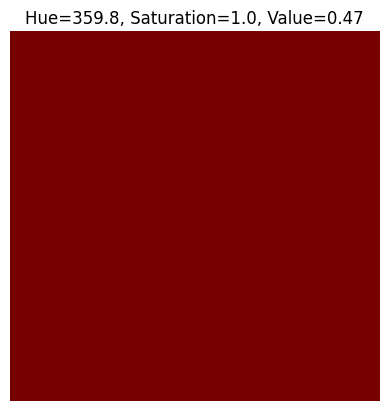

In [ ]:
def rgb_to_hsv(r, g, b):
    r /= 255.0
    g /= 255.0
    b /= 255.0
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    h *= 360.0  # HSV의 색상 값은 0~360 사이의 값으로 표현됩니다.
    return h, s, v

for i in range(0,len(val_dataset)):
  r=val_dataset[i][0][0]
  g=val_dataset[i][0][1]
  b=val_dataset[i][0][2]

  # RGB를 HSV로 변환
  h, s, v = rgb_to_hsv(r, g, b)

  # orange -> brown 으로 인식. brown 수정
  sample_hue = round(h,2) # 예시로 Hue 값을 180으로 설정
  sample_saturation = round(s,2)
  sample_value = round(v,2)

  loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/seol/ckpt/color_regression_fin.h5')
  sample_hsv = np.array([[sample_hue, sample_saturation, sample_value]], dtype=np.float32)
  predicted_color_probs = loaded_model.predict(sample_hsv)
  predicted_color_label = np.argmax(predicted_color_probs)

  print(f"Predicted color for HSV ({sample_hue}, {sample_saturation}, {sample_value}): {predicted_color_label}")

  rgb_color = hsv_to_rgb(sample_hue, sample_saturation, sample_value)

  plt.imshow([[(rgb_color[0]/255, rgb_color[1]/255, rgb_color[2]/255)]])
  plt.title(f"Hue={sample_hue}, Saturation={sample_saturation}, Value={sample_value}")
  plt.axis('off')

#### confusin matrix

41/41 [==============================] - 0s 2ms/step


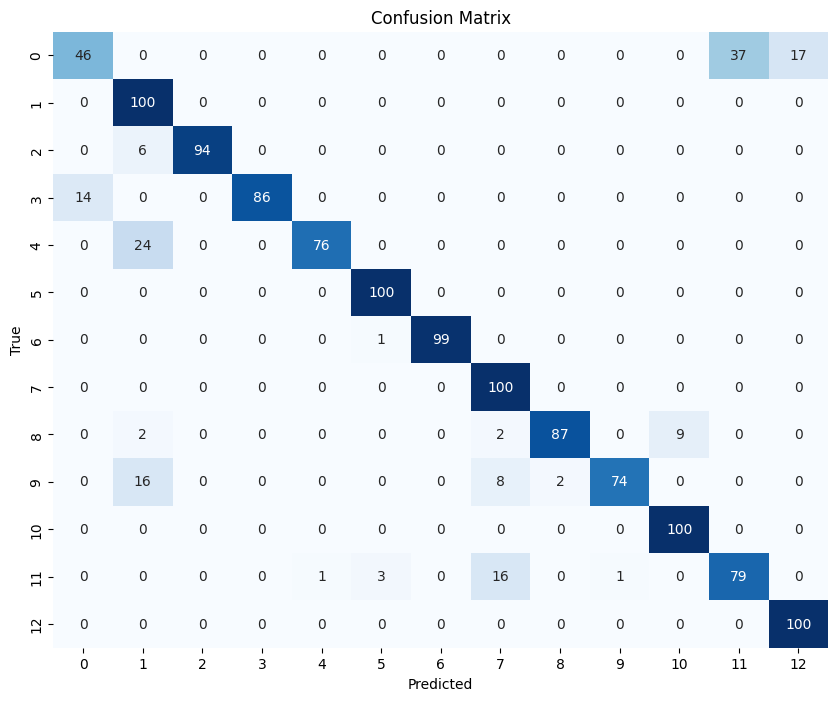

In [30]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/seol/ckpt/color_regression_fin.h5')

# 검증 데이터 가져오기
X_val = np.array([data[0] for data in val_dataset], dtype=np.float32)
y_val = np.array([data[1] for data in val_dataset], dtype=np.int32)

# 모델에 검증 데이터 입력하여 예측값 얻기
y_pred = loaded_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # 각 데이터 포인트에 대한 클래스 예측값

# Confusion Matrix 계산
confusion_mtx = confusion_matrix(y_val, y_pred_classes)

# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
